In [25]:
import math
import pandas as pd
import seaborn as sns #visualisation
%matplotlib inline
sns.set(color_codes=True)
import numpy as np
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
#plt.style.use('fivethirtyeight')

**TESLA**

In [26]:
start_date = '2010-06-30'
end_date = '2020-11-30'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
tesladf = pdr.data.DataReader( "TSLA", 'yahoo', start_date, end_date)

In [27]:
from google.colab import files
tesladf.to_csv('tesla.csv') 

In [ ]:
#tesladf = tesladf.reset_index()

In [ ]:
#tesladf['Date']=tesladf['Date'].astype('datetime64[ns]')

In [28]:
tesladf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2624 entries, 2010-06-30 to 2020-11-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2624 non-null   float64
 1   Low        2624 non-null   float64
 2   Open       2624 non-null   float64
 3   Close      2624 non-null   float64
 4   Volume     2624 non-null   float64
 5   Adj Close  2624 non-null   float64
dtypes: float64(6)
memory usage: 143.5 KB


In [29]:
tesladf.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-30,6.084,4.660,5.158,4.766,85935500.0,4.766
2010-07-01,5.184,4.054,5.000,4.392,41094000.0,4.392
2010-07-02,4.620,3.742,4.600,3.840,25699000.0,3.840
2010-07-06,4.000,3.166,4.000,3.222,34334500.0,3.222
2010-07-07,3.326,2.996,3.280,3.160,34608500.0,3.160


In [30]:
tesladf.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-11-23,526.000000,501.790009,503.500000,521.849976,50260300.0,521.849976
2020-11-24,559.989990,526.200012,540.400024,555.380005,53648500.0,555.380005
2020-11-25,574.000000,545.369995,550.059998,574.000000,48930200.0,574.000000
2020-11-27,598.780029,578.450012,581.159973,585.760010,37561100.0,585.760010
2020-11-30,607.799988,554.510010,602.210022,567.599976,63003100.0,567.599976


In [31]:
tesladf.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2624.000000,2624.000000,2624.000000,2624.000000,2.624000e+03,2624.000000
mean,57.222118,54.711097,55.991704,56.022998,3.155862e+07,56.022998
std,79.442284,74.995563,77.286748,77.366423,2.909417e+07,77.366423
min,3.326000,2.996000,3.228000,3.160000,5.925000e+05,3.160000
25%,7.566500,7.289500,7.337000,7.389500,1.103238e+07,7.389500
50%,45.034000,43.619999,44.373999,44.206001,2.473925e+07,44.206001
75%,61.358000,59.069501,60.201000,60.244499,4.083925e+07,60.244499
max,607.799988,578.450012,602.210022,585.760010,3.046940e+08,585.760010


In [32]:
tesladf.shape

(2624, 6)

In [33]:
tesladata = tesladf.filter(['Close'])
#cconvert dataframe to an array
dataset = tesladata.values
#compute number of rows to train model
training_data_len = math.ceil(len(dataset) * .8)
training_data_len
#80% of 2624 rounded up will get me 2100

2100

In [34]:
#scale data before passing it to neural network
teslascaler = MinMaxScaler(feature_range=(0,1))
#transform data
teslascaled_data = teslascaler.fit_transform(dataset)
teslascaled_data

array([[0.00275661],
       [0.00211466],
       [0.00116718],
       ...,
       [0.97981461],
       [1.        ],
       [0.96882933]])

In [35]:
#create trainng dataset by first creating a scaled traiing dataset
train_datat = teslascaled_data[0:training_data_len, :]
#split data into xtrain and ytrain
x_train = []#independent
y_train = []#dependent
for i in range(60, len(train_datat)):
  x_train.append(train_datat[i-60:i,0])#cotains 0 to 59 values
  y_train.append(train_datat[i,0])#contains 61 value ie 60 value
  if i <= 61:
    print(x_train)
    print(y_train)
    print()
#array results are xtrain and 0.0014 is the ytrain

[array([0.00275661, 0.00211466, 0.00116718, 0.00010642, 0.        ,
       0.00056986, 0.00054926, 0.00042911, 0.0008033 , 0.00138689,
       0.00140405, 0.00166152, 0.00209749, 0.0015448 , 0.00151734,
       0.0017851 , 0.00188465, 0.00176794, 0.00163062, 0.00168898,
       0.00156196, 0.00142121, 0.00175764, 0.00211123, 0.00187436,
       0.00159629, 0.00130106, 0.0013045 , 0.00110882, 0.00072091,
       0.00061792, 0.00086509, 0.001023  , 0.00115002, 0.00101957,
       0.00102643, 0.00113285, 0.00148644, 0.00116718, 0.00140748,
       0.00135599, 0.00133883, 0.00139718, 0.0012633 , 0.00159629,
       0.0018057 , 0.00180227, 0.00162719, 0.00175077, 0.00168555,
       0.00150017, 0.00168898, 0.0018263 , 0.00212152, 0.0017645 ,
       0.00152077, 0.0018057 , 0.00170614, 0.00139718, 0.00129077])]
[0.0014761412303588772]

[array([0.00275661, 0.00211466, 0.00116718, 0.00010642, 0.        ,
       0.00056986, 0.00054926, 0.00042911, 0.0008033 , 0.00138689,
       0.00140405, 0.00166152, 0.

In [36]:
#convert xtrain and ytrain to numpy arrays
x_train, y_train = np.array(x_train),np.array(y_train)

In [37]:
#reshape data since we want it to be 3D instead of 2D
x_train.shape

(2040, 60)

In [38]:
#results shows 2D if we rehshape it . instead of using 2040 chaingint it to xtrain.shape in number of rows
#and 60 as number of cols to xtrain shape 1
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2040, 60, 1)

**LSTM Modelling**

In [39]:
model_t = Sequential()
model_t.add(LSTM(70, return_sequences=True,input_shape = (x_train.shape[1],1)))
model_t.add(LSTM(70, return_sequences=False))
model_t.add(Dense(25))
model_t.add(Dense(1))

In [40]:
#compile model and optimizer and loss function
model_t.compile(optimizer='adam', loss = 'mean_squared_error')

In [41]:
#train model
model_t.fit(x_train,y_train, batch_size=1,epochs=1)

2040/2040 [==============================] - 39s 18ms/step - loss: 1.0914e-04


In [42]:
#create test data
#create new array contianing scaled values from index 2040 
test_data = teslascaled_data[training_data_len - 60:, :]
#create dataset xtest and ytest
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
 x_test.append(test_data[i-60:i,0])

In [43]:
#convert data to numpy array
x_test = np.array(x_test)

In [44]:
#reshape data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [45]:
#get model predicted value for x test dataset
t_predictions = model_t.predict(x_test)
t_predictions = teslascaler.inverse_transform(t_predictions)

In [22]:
#tesladf['Close'].mean() 
#56.02299766633205

In [46]:
#evaluate model by getting rmse. this measures how accurate model prediction
#lower rmse better fit
t_rmse = np.sqrt(np.mean(t_predictions - y_test)**2)
t_rmse 

12.958838761307812

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


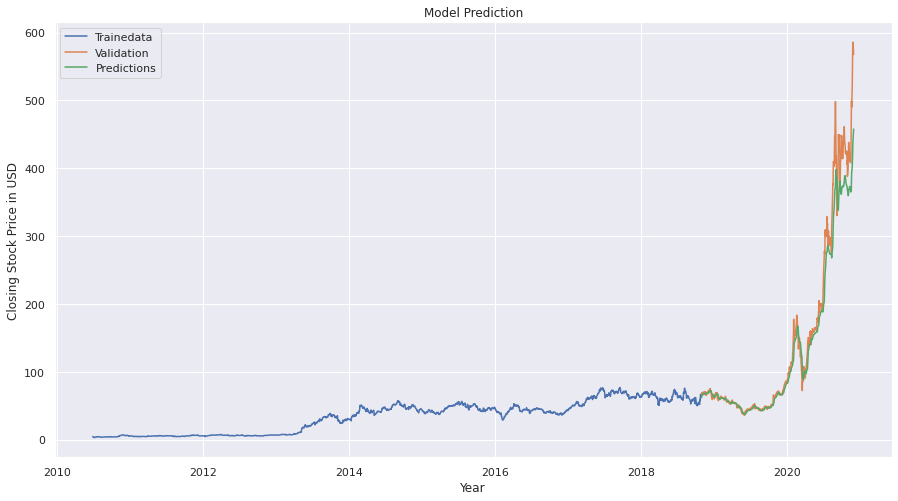

In [47]:
#plot data
t_train = tesladata[:training_data_len]
valid = tesladata[training_data_len:]
valid['Predictions'] = t_predictions
#Visualise model
plt.figure(figsize=(15,8))
plt.title('Model Prediction')
plt.xlabel('Year')
plt.ylabel('Closing Stock Price in USD')
plt.plot(t_train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Trainedata','Validation','Predictions'])
plt.show()

In [48]:
#show actual price and predicted 
valid

,Close,Predictions
Date,,
2018-10-31,67.463997,61.890495
2018-11-01,68.856003,63.294338
2018-11-02,69.281998,64.579147
2018-11-05,68.279999,65.672112
2018-11-06,68.211998,66.351059
...,...,...
2020-11-23,521.849976,403.104431
2020-11-24,555.380005,414.820526
2020-11-25,574.000000,429.211731


In [49]:
#try predict price for 2020-12-01
start_date = '2010-06-30'
end_date = '2020-11-30'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
tesla = pdr.data.DataReader( "TSLA", 'yahoo', start_date, end_date)

**Predicting possible close stock price**

In [50]:
newdf = tesla.filter(['Close'])
lastday = newdf[-60:].values
lastdayscaled = teslascaler.transform(lastday)
t_testing = []
t_testing.append(lastdayscaled)
t_testing = np.array(t_testing)
t_testing =np.reshape(t_testing,(t_testing.shape[0],t_testing.shape[1],1))
predictprice = model_t.predict(t_testing)
#undo scalinh
predictprice = teslascaler.inverse_transform(predictprice)
print(predictprice)

[[465.69907]]


In [51]:
start_date = '2020-12-01'
end_date = '2020-12-30'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
tesla2 = pdr.data.DataReader( "TSLA", 'yahoo', start_date, end_date)
print(tesla2['Close'])

Date
2020-12-01    584.760010
2020-12-02    568.820007
2020-12-03    593.380005
2020-12-04    599.039978
2020-12-07    641.760010
2020-12-08    649.880005
2020-12-09    604.479980
2020-12-10    627.070007
2020-12-11    609.989990
2020-12-14    639.830017
2020-12-15    633.250000
2020-12-16    622.770020
2020-12-17    655.900024
2020-12-18    695.000000
2020-12-21    649.859985
2020-12-22    640.340027
2020-12-23    645.979980
2020-12-24    661.770020
2020-12-28    663.690002
2020-12-29    665.989990
2020-12-30    694.780029
Name: Close, dtype: float64


**BMW**

In [52]:
start_date = '1996-11-09'
end_date = '2020-11-30'

bmwdf = pdr.data.DataReader( "BMW.DE", 'yahoo', start_date, end_date)

In [53]:
from google.colab import files
bmwdf.to_csv('bmw.csv') 

In [54]:
bmwdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6170 entries, 1996-11-11 to 2020-11-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       6170 non-null   float64
 1   Low        6170 non-null   float64
 2   Open       6170 non-null   float64
 3   Close      6170 non-null   float64
 4   Volume     6170 non-null   float64
 5   Adj Close  6170 non-null   float64
dtypes: float64(6)
memory usage: 337.4 KB


In [55]:
bmwdf.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1996-11-11,18.200001,18.082001,18.190001,18.122000,260000.0,10.014695
1996-11-12,18.327999,18.091999,18.160999,18.259001,1066000.0,10.090405
1996-11-13,18.344000,18.190001,18.344000,18.230000,793000.0,10.074377
1996-11-14,18.289000,18.132000,18.205000,18.289000,351000.0,10.106983
1996-11-15,18.440001,18.268999,18.308001,18.438000,624000.0,10.189323


In [56]:
bmwdf.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-11-24,76.680000,74.599998,74.849998,76.680000,1844609.0,73.215469
2020-11-25,77.309998,74.639999,77.000000,75.400002,1489748.0,71.993309
2020-11-26,75.320000,73.669998,75.300003,74.129997,1215517.0,70.780685
2020-11-27,73.809998,72.599998,73.769997,73.089996,1699488.0,69.787666
2020-11-30,73.760002,72.250000,72.510002,73.040001,1921018.0,69.739929


In [57]:
bmwdf.describe()

,High,Low,Open,Close,Volume,Adj Close
count,6170.000000,6170.000000,6170.000000,6170.000000,6.170000e+03,6170.000000
mean,51.776745,50.463301,51.152504,51.130312,2.257900e+06,35.949383
std,23.134542,22.798905,22.989281,22.976810,1.513670e+06,20.735601
min,17.815001,16.000000,17.280001,17.040001,0.000000e+00,9.998116
25%,33.700001,32.802500,33.299999,33.250000,1.341399e+06,19.679695
50%,41.882500,40.745998,41.299999,41.300001,1.960617e+06,25.111763
75%,72.357500,70.905003,71.664999,71.680000,2.783427e+06,57.628380
max,123.750000,120.349998,123.300003,122.599998,2.871954e+07,90.201874


In [58]:
bmwdf.shape

(6170, 6)

Explain observation

In [59]:
bmwdata = bmwdf.filter(['Close'])
#convert df to an array
dataset1 = bmwdata.values
#compute number of rown to train model
training_data_len1 = math.ceil(len(dataset1)* .8)
training_data_len1
#80% of 6170 will give me 4936

4936

In [60]:
#scaling data before passing it to neural network
bmwscaler = MinMaxScaler(feature_range=(0,1))
#transform data
bmwscaled_data = bmwscaler.fit_transform(dataset1)
bmwscaled_data

array([[0.01025008],
       [0.01154793],
       [0.0112732 ],
       ...,
       [0.54082984],
       [0.53097761],
       [0.53050399]])

In [61]:
#create training dataset first by creating a scaled traing dataset
train_datab = bmwscaled_data[0:training_data_len1,:]
#split data into xtrain and ytrain
x_train1 = []
y_train1 = []
for i in range(60, len(train_datab)):
  x_train1.append(train_datab[i-60:i,0])
  y_train1.append(train_datab[i,0])
  if i <= 61:
    print(x_train1)
    print(y_train1)
    print()

[array([0.01025008, 0.01154793, 0.0112732 , 0.01183212, 0.01324364,
       0.01350889, 0.01424782, 0.01147213, 0.01164265, 0.01300681,
       0.01844447, 0.0213433 , 0.01974232, 0.02488631, 0.02512314,
       0.02796514, 0.03901099, 0.03777945, 0.03417961, 0.03064607,
       0.03679423, 0.03809208, 0.03237968, 0.03082607, 0.02766198,
       0.03026714, 0.0284009 , 0.02877982, 0.02949033, 0.03327017,
       0.03490905, 0.03490905, 0.03490905, 0.03490905, 0.03515535,
       0.03791208, 0.03791208, 0.03791208, 0.03455853, 0.03529746,
       0.03476694, 0.03344069, 0.03623531, 0.03716368, 0.03641531,
       0.03957938, 0.04629594, 0.04238347, 0.0400341 , 0.04331185,
       0.04126562, 0.04126562, 0.038651  , 0.03823417, 0.03140393,
       0.03055133, 0.03233231, 0.03203865, 0.03502272, 0.03399961])]
[0.032303902295178655]

[array([0.01025008, 0.01154793, 0.0112732 , 0.01183212, 0.01324364,
       0.01350889, 0.01424782, 0.01147213, 0.01164265, 0.01300681,
       0.01844447, 0.0213433 , 0.0

In [62]:
#converting them to arrays
x_train1, y_train1 = np.array(x_train1),np.array(y_train1)

In [63]:
#reshape in order to be 3D
x_train1.shape

(4876, 60)

In [64]:
x_train1 = np.reshape(x_train1,(x_train1.shape[0],x_train1.shape[1],1))
x_train1.shape

(4876, 60, 1)

**LSTM Modelling**

In [65]:
model_b = Sequential()
model_b.add(LSTM(70, return_sequences=True, input_shape = (x_train1.shape[1],1)))
model_b.add(LSTM(70, return_sequences=False))
model_b.add(Dense(25))
model_b.add(Dense(1))

In [66]:
#compile model also using loss and optimiser function
model_b.compile(optimizer='adam', loss = 'mean_squared_error')

In [67]:
model_b.fit(x_train1,y_train1, batch_size=1, epochs=1)

4876/4876 [==============================] - 89s 18ms/step - loss: 0.0017


In [68]:
#creating a test data
test_data1 = bmwscaled_data[training_data_len1 - 60:,:]
#creating test x and y dataset
x_test1 = []
y_test1 = dataset1[training_data_len1:,:]
for i in range(60, len(test_data1)):
  x_test1.append(test_data1[i-60:i,0])

In [69]:
#convert data to numpy array
x_test1 = np.array(x_test1)

In [70]:
#reshape data
x_test1 = np.reshape(x_test1,(x_test1.shape[0],x_test1.shape[1],1))

In [71]:
#get model predicted value for xtest dataset 
b_predictions = model_b.predict(x_test1)
b_predictions = bmwscaler.inverse_transform(b_predictions)

In [ ]:
#bmwdf['Close'].mean()
#51.130312470756046

51.130312470756046

In [72]:
#evaluate model by getting rmse
b_rmse = np.sqrt(np.mean(b_predictions - y_test1)**2)
b_rmse

0.5241477416052425

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


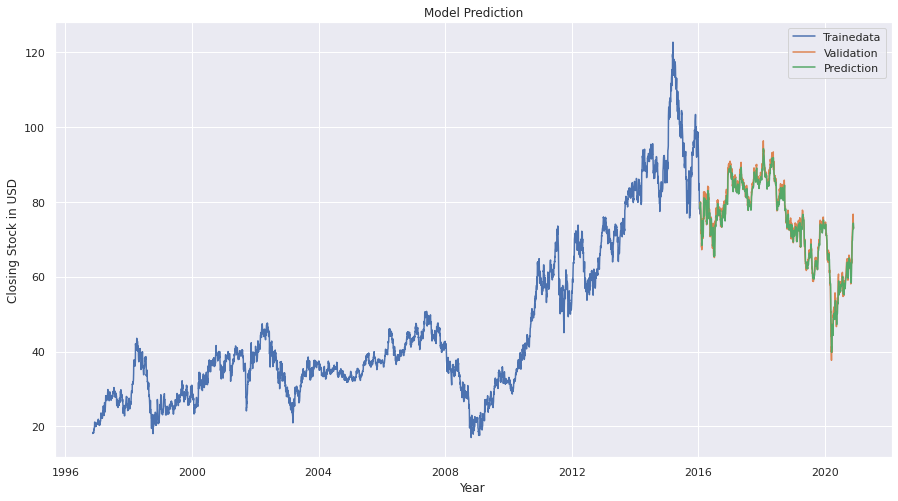

In [73]:
b_train = bmwdata[:training_data_len1]
valid1 = bmwdata[training_data_len1:]
valid1['Predictions'] = b_predictions
#visualising
plt.figure(figsize=(15,8))
plt.title('Model Prediction')
plt.xlabel('Year')
plt.ylabel('Closing Stock in USD')
plt.plot(b_train['Close'])
plt.plot(valid1[['Close','Predictions']])
plt.legend(['Trainedata','Validation','Prediction'])
plt.show()

In [74]:
#show actual and predicted price
valid1

,Close,Predictions
Date,,
2016-01-21,78.699997,78.251930
2016-01-22,79.709999,78.552040
2016-01-25,78.919998,79.350151
2016-01-26,79.400002,79.474571
2016-01-27,79.959999,79.565308
...,...,...
2020-11-24,76.680000,72.691139
2020-11-25,75.400002,73.924866
2020-11-26,74.129997,74.288483


In [75]:
#predicting price for 2020-12-01
start_date = '1996-11-09'
end_date = '2020-11-30'

bmwdf = pdr.data.DataReader( "BMW.DE", 'yahoo', start_date, end_date)

In [76]:
newbmw = bmwdf.filter(['Close'])
lastday1 = newbmw[-60:].values
lastdayscaled1 = bmwscaler.transform(lastday1)
b_testing = []
b_testing.append(lastdayscaled1)
b_testing = np.array(b_testing)
b_testing = np.reshape(b_testing,(b_testing.shape[0],b_testing.shape[1],1))
predictprice1 = model_b.predict(b_testing)
predictprice1 = bmwscaler.inverse_transform(predictprice1)
print(predictprice1)

[[72.313446]]


In [77]:
start_date = '2020-12-01'
end_date = '2020-12-01'

bmw2 = pdr.data.DataReader( "BMW.DE", 'yahoo', start_date, end_date)
print(bmw2['Close'])

Date
2020-12-01    74.779999
Name: Close, dtype: float64


**Crude Oil**

In [78]:
#Title: Ways to import CSV files in Google Colab using Pydrive
#Item type: Blog Post
#Author: GeeksforGeeks
#Availability: https://www.geeksforgeeks.org/ways-to-import-csv-files-in-google-colab/

# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [79]:
link = 'https://drive.google.com/file/d/1bDmksCT2qU5xelMH8IpulvcfM9r9lnPz/view?usp=sharing'

In [80]:
id = link.split("/")[-2]
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('crudeoil.csv')
oildf = pd.read_csv('crudeoil.csv')

In [81]:
from google.colab import files
oildf.to_csv('crudeoil.csv')

In [82]:
oildf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6244 entries, 0 to 6243
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6244 non-null   object 
 1   Open       5099 non-null   float64
 2   High       5099 non-null   float64
 3   Low        5099 non-null   float64
 4   Close      5099 non-null   float64
 5   Adj Close  5099 non-null   float64
 6   Volume     5099 non-null   float64
dtypes: float64(6), object(1)
memory usage: 341.6+ KB


In [83]:
print(oildf.isnull().sum())

Date            0
Open         1145
High         1145
Low          1145
Close        1145
Adj Close    1145
Volume       1145
dtype: int64


In [84]:
oildf = oildf.dropna()

In [85]:
oildf.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-03-22,27.65,28.250000,27.250000,27.459999,27.459999,92302.0
1,2000-03-23,27.65,27.780001,27.160000,27.309999,27.309999,79373.0
2,2000-03-24,27.85,28.150000,27.549999,27.980000,27.980000,55693.0
4,2000-03-27,27.65,28.020000,27.410000,27.730000,27.730000,59199.0
5,2000-03-28,27.60,27.870001,27.000000,27.080000,27.080000,39487.0


In [86]:
oildf.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
6239,2020-07-16,40.900002,41.139999,40.520000,40.759998,40.759998,77425275.0
6240,2020-07-17,40.740002,40.900002,40.020000,40.570000,40.570000,28236139.0
6241,2020-07-19,40.639999,40.650002,40.459999,40.630001,40.630001,7030.0
6242,2020-07-20,40.360001,40.910000,39.830002,40.650002,40.650002,8747221.0
6243,2020-07-21,40.840000,42.400002,40.840000,41.759998,41.759998,1323868.0


In [87]:
oildf.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5099.000000,5099.000000,5099.000000,5099.000000,5099.000000,5.099000e+03
mean,61.420967,62.331418,60.443248,61.424156,61.424156,2.151295e+06
std,26.177958,26.410581,25.923062,26.174414,26.174414,2.355769e+07
min,1.400000,13.850000,-39.439999,-2.720000,-2.720000,0.000000e+00
25%,40.229999,40.975001,39.410000,40.185000,40.185000,1.025160e+05
50%,58.310001,59.040001,57.360001,58.139999,58.139999,2.459150e+05
75%,81.785000,82.860000,80.524998,81.769997,81.769997,3.917165e+05
max,145.190002,147.270004,142.490005,145.179993,145.179993,4.599355e+08


In [88]:
oildf.shape

(5099, 7)

In [89]:
oildata = oildf.filter(['Close'])
dataset2 = oildata.values
training_data_len2 = math.ceil(len(dataset2)*.8)
training_data_len2
#4079.2 rounded up to 4080

4080

In [90]:
oilscaler = MinMaxScaler(feature_range=(0,1))
oildscaled_data = oilscaler.fit_transform(dataset2)
oildscaled_data

array([[0.2040568 ],
       [0.2030426 ],
       [0.20757269],
       ...,
       [0.29310347],
       [0.2932387 ],
       [0.30074375]])

In [91]:
train_datao = oildscaled_data[0:training_data_len2,:]
x_train2 = []
y_train2 = []
for i in range(60,len(train_datao)):
  x_train2.append(train_datao[i-60:i,0])
  y_train2.append(train_datao[i,0])
  if i <=61:
    print(x_train2)
    print(y_train2)
    print()

[array([0.2040568 , 0.2030426 , 0.20757269, 0.20588236, 0.2014875 ,
       0.19722787, 0.19885059, 0.20027046, 0.19722787, 0.19012847,
       0.19317107, 0.19215688, 0.18674781, 0.17931035, 0.18167682,
       0.19080461, 0.18958757, 0.19215688, 0.19344152, 0.19519947,
       0.20229887, 0.1933739 , 0.19445573, 0.18965518, 0.18519271,
       0.19012847, 0.192833  , 0.1933063 , 0.20040569, 0.19925626,
       0.20081137, 0.20331306, 0.20831644, 0.21244086, 0.20872212,
       0.21514538, 0.21866127, 0.22068967, 0.21940501, 0.21663287,
       0.22346181, 0.22123057, 0.21230562, 0.21331982, 0.22075728,
       0.22467885, 0.22123057, 0.22359704, 0.21514538, 0.2219067 ,
       0.2239351 , 0.21920218, 0.2198107 , 0.22123057, 0.21974309,
       0.2229209 , 0.23286004, 0.23847195, 0.24083843, 0.24117649])]
[0.23711967315644158]

[array([0.2040568 , 0.2030426 , 0.20757269, 0.20588236, 0.2014875 ,
       0.19722787, 0.19885059, 0.20027046, 0.19722787, 0.19012847,
       0.19317107, 0.19215688, 0.18

In [92]:
x_train2, y_train2 = np.array(x_train2),np.array(y_train2)

In [93]:
x_train2.shape

(4020, 60)

In [94]:
x_train2 = np.reshape(x_train2,(x_train2.shape[0],x_train2.shape[1],1))
x_train2.shape

(4020, 60, 1)

**LSTM Modelling**

In [95]:
model_o = Sequential()
model_o.add(LSTM(70, return_sequences=True, input_shape = (x_train2.shape[1],1)))
model_o.add(LSTM(70, return_sequences=False))
model_o.add(Dense(25))
model_o.add(Dense(1))

In [96]:
model_o.compile(optimizer='adam',loss='mean_squared_error')

In [97]:
model_o.fit(x_train2,y_train2, batch_size=1,epochs=1)

4020/4020 [==============================] - 77s 18ms/step - loss: 0.0018


In [98]:
test_data2 = oildscaled_data[training_data_len2 - 60:,:]
x_test2 = []
y_test2 = dataset2[training_data_len2:,:]
for i in range(60, len(test_data2)):
  x_test2.append(test_data2[i-60:i,0])

In [99]:
x_test2 = np.array(x_test2)

In [100]:
x_test2 = np.reshape(x_test2,(x_test2.shape[0],x_test2.shape[1],1))

In [101]:
o_predictions = model_o.predict(x_test2)
o_predictions = oilscaler.inverse_transform(o_predictions)

In [102]:
o_rmse = np.sqrt(np.mean(o_predictions - y_test2)**2)
o_rmse

0.20517333054598125

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


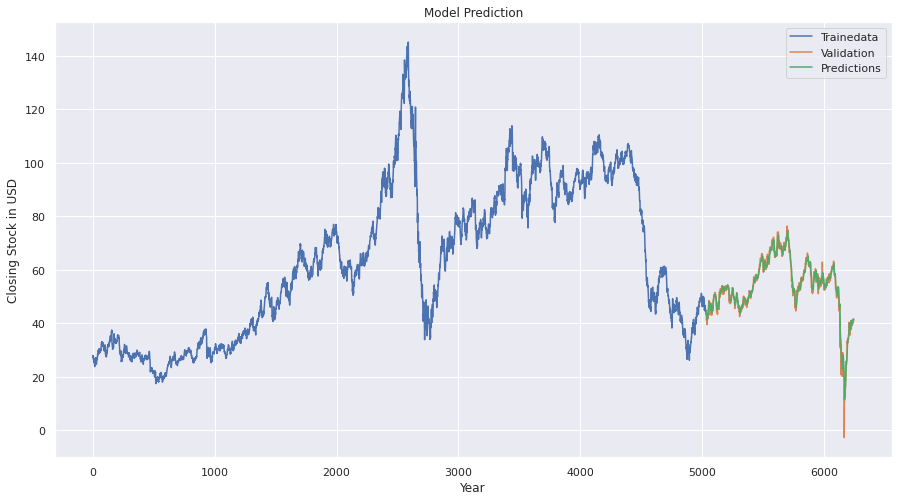

In [103]:
o_train = oildata[:training_data_len2]
valid2 = oildata[training_data_len2:]
valid2['Predictions'] = o_predictions
plt.figure(figsize=(15,8))
plt.title('Model Prediction')
plt.xlabel('Year')
plt.ylabel('Closing Stock in USD')
plt.plot(o_train['Close'])
plt.plot(valid2[['Close','Predictions']])
plt.legend(['Trainedata','Validation','Predictions'])
plt.show()

In [104]:
valid2

,Close,Predictions
5034,42.919998,44.724380
5035,41.919998,44.203484
5036,41.139999,43.551224
5037,41.599998,42.836040
5039,40.060001,42.485897
...,...,...
6239,40.759998,41.264038
6240,40.570000,41.385944
6241,40.630001,41.383499
6242,40.650002,41.364491


In [105]:
start_date = '2000-03-22'
end_date = '2020-07-21'

In [106]:
newoil = oildf.filter(['Close'])
lastday2 = newoil[-60:].values
lastdayscaled2 = oilscaler.transform(lastday2)
o_testing = []
o_testing.append(lastdayscaled2)
o_testing = np.array(o_testing)
o_testing = np.reshape(o_testing,(o_testing.shape[0],o_testing.shape[1],1))
predictprice2 = model_o.predict(o_testing)
predictprice2 = oilscaler.inverse_transform(predictprice2)
print(predictprice2)

[[41.693]]


**Carbon Dataset**

In [107]:
#Title: Ways to import CSV files in Google Colab using Pydrive
#Item type: Blog Post
#Author: GeeksforGeeks
#Availability: https://www.geeksforgeeks.org/ways-to-import-csv-files-in-google-colab/

# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [108]:
link = 'https://drive.google.com/file/d/1vZGR58aOIt4b58EyFFzqf2SdH0XVFLw-/view?usp=sharing'

In [109]:
id = link.split("/")[-2]
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('carbonemissions.csv')
carbondf = pd.read_csv('carbonemissions.csv')

In [110]:
from google.colab import files
carbondf.to_csv('carbonemissions.csv') 

In [111]:
carbondf.drop(['iso_code','co2_growth_abs','consumption_co2','trade_co2','trade_co2_share','co2_per_capita','consumption_co2_per_capita','co2_growth_prct','cumulative_co2','share_global_cumulative_co2','consumption_co2_per_gdp','co2_per_unit_energy','cement_co2','coal_co2','flaring_co2','gas_co2','oil_co2','cement_co2_per_capita','coal_co2_per_capita','flaring_co2_per_capita','gas_co2_per_capita','oil_co2_per_capita','total_ghg','ghg_per_capita','methane','methane_per_capita','nitrous_oxide','nitrous_oxide_per_capita','primary_energy_consumption','energy_per_capita','energy_per_gdp','population','gdp'], axis=1, inplace=True)

In [112]:
carbondf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24016 entries, 0 to 24015
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           24016 non-null  object 
 1   year              24016 non-null  int64  
 2   co2               23372 non-null  float64
 3   share_global_co2  23372 non-null  float64
 4   co2_per_gdp       14949 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 938.2+ KB


In [113]:
carbondf.head()

,country,year,co2,share_global_co2,co2_per_gdp
0,Afghanistan,1949,0.015,0.000,NaN
1,Afghanistan,1950,0.084,0.001,0.004
2,Afghanistan,1951,0.092,0.001,0.005
3,Afghanistan,1952,0.092,0.001,0.004
4,Afghanistan,1953,0.106,0.002,0.005


In [114]:
carbondf.tail()

,country,year,co2,share_global_co2,co2_per_gdp
24011,Zimbabwe,2014,11.962,0.034,0.483
24012,Zimbabwe,2015,12.163,0.034,0.486
24013,Zimbabwe,2016,10.807,0.030,0.430
24014,Zimbabwe,2017,12.026,0.033,NaN
24015,Zimbabwe,2018,12.263,0.034,NaN


In [115]:
carbondf = carbondf[carbondf.country == 'United States']

In [116]:
carbondf['co2_per_gdp'] = carbondf['co2_per_gdp'].fillna(0)

In [117]:
carbondf.tail()

,country,year,co2,share_global_co2,co2_per_gdp
22888,United States,2014,5572.106,15.693,0.338
22889,United States,2015,5422.966,15.292,0.321
22890,United States,2016,5306.662,14.875,0.309
22891,United States,2017,5270.749,14.579,0.000
22892,United States,2018,5416.278,14.810,0.000


In [118]:
carbondf.shape

(268, 5)

co2

In [119]:
carbondata = carbondf.filter(['co2'])
carbondataset = carbondata.values
training_data_len4 = math.ceil(len(carbondataset)*.8)
training_data_len4

215

co2 gdp

In [120]:
carbondata1 = carbondf.filter(['co2_per_gdp'])
carbondataset1 = carbondata1.values
training_data_len5 = math.ceil(len(carbondataset1)*.8)
training_data_len5

215

share global

In [121]:
carbondata2 = carbondf.filter(['share_global_co2'])
carbondataset2 = carbondata2.values
training_data_len6 = math.ceil(len(carbondataset2)*.8)
training_data_len6

215

co2

In [122]:
carbonscaler = MinMaxScaler(feature_range=(0,1))
carbonscaled_data = carbonscaler.fit_transform(carbondataset)
carbonscaled_data

array([[0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],


co2 gdp

In [123]:
carbonscaler1 = MinMaxScaler(feature_range=(0,1))
carbonscaled_data1 = carbonscaler1.fit_transform(carbondataset1)
carbonscaled_data1

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.   

share global

In [124]:
carbonscaler2 = MinMaxScaler(feature_range=(0,1))
carbonscaled_data2 = carbonscaler2.fit_transform(carbondataset2)
carbonscaled_data2

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.   

co2

In [125]:
traincarbon = carbonscaled_data[0:training_data_len4,:]
carbonx_train = []
carbony_train = []
for i in range(60,len(traincarbon)):
  carbonx_train.append(traincarbon[i-60:i,0])
  carbony_train.append(traincarbon[i,0])
  if i<=61:
    print(carbonx_train)
    print(carbony_train)
    print()

[array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.12687145e-05, 4.35523587e-05, 4.71409426e-05,
       4.84458822e-05, 5.43181103e-05, 5.56230499e-05, 5.43181103e-05,
     

co2 gdp

In [126]:
traincarbon1 = carbonscaled_data1[0:training_data_len5,:]
carbonx_train1 = []
carbony_train1 = []
for i in range(60,len(traincarbon1)):
  carbonx_train1.append(traincarbon1[i-60:i,0])
  carbony_train1.append(traincarbon1[i,0])
  if i<=61:
    print(carbonx_train1)
    print(carbony_train1)
    print()

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])]
[0.0]

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])]
[0.0, 0.0]



shareglobal

In [127]:
traincarbon2 = carbonscaled_data2[0:training_data_len6,:]
carbonx_train2 = []
carbony_train2 = []
for i in range(60,len(traincarbon2)):
  carbonx_train2.append(traincarbon2[i-60:i,0])
  carbony_train2.append(traincarbon2[i,0])
  if i<=61:
    print(carbonx_train2)
    print(carbony_train2)
    print()

[array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01655842,
       0.01760712, 0.01447942, 0.01734955, 0.0178831 , 0.01876621,
       0.01749673, 0.01882141, 0.02056924, 0.02113959, 0.02055084])]
[0.020771622541534043]

[array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0. 

Co2

In [128]:
carbonx_train,carbony_train = np.array(carbonx_train),np.array(carbony_train)
carbonx_train.shape

(155, 60)

co2 gdp

In [129]:
carbonx_train1,carbony_train1 = np.array(carbonx_train1),np.array(carbony_train1)
carbonx_train1.shape

(155, 60)

share global

In [130]:
carbonx_train2,carbony_train2 = np.array(carbonx_train2),np.array(carbony_train2)
carbonx_train2.shape

(155, 60)

co2

In [131]:
carbonx_train = np.reshape(carbonx_train, (carbonx_train.shape[0],carbonx_train.shape[1],1))
carbonx_train.shape

(155, 60, 1)

co2 gdp

In [132]:
carbonx_train1 = np.reshape(carbonx_train1, (carbonx_train1.shape[0],carbonx_train1.shape[1],1))
carbonx_train1.shape

(155, 60, 1)

share global

In [133]:
carbonx_train2 = np.reshape(carbonx_train2, (carbonx_train2.shape[0],carbonx_train2.shape[1],1))
carbonx_train2.shape

(155, 60, 1)

**LSTM Modelling**


co2

In [134]:
carbonmodel = Sequential()
carbonmodel.add(LSTM(70, return_sequences=True, input_shape = (carbonx_train.shape[1],1)))
carbonmodel.add(LSTM(70,return_sequences=False))
carbonmodel.add(Dense(25))
carbonmodel.add(Dense(1))

co2 gdp

In [135]:
carbonmodel1 = Sequential()
carbonmodel1.add(LSTM(70, return_sequences=True, input_shape = (carbonx_train1.shape[1],1)))
carbonmodel1.add(LSTM(70,return_sequences=False))
carbonmodel1.add(Dense(25))
carbonmodel1.add(Dense(1))

share global

In [136]:
carbonmodel2 = Sequential()
carbonmodel2.add(LSTM(70, return_sequences=True, input_shape = (carbonx_train2.shape[1],1)))
carbonmodel2.add(LSTM(70,return_sequences=False))
carbonmodel2.add(Dense(25))
carbonmodel2.add(Dense(1))

co2

In [137]:
carbonmodel.compile(optimizer='adam',loss='mean_squared_error')

co2 gdp

In [138]:
carbonmodel1.compile(optimizer='adam',loss='mean_squared_error')

share global

In [139]:
carbonmodel2.compile(optimizer='adam',loss='mean_squared_error')

co2

In [140]:
carbonmodel.fit(carbonx_train, carbony_train, batch_size = 1,epochs = 1)

155/155 [==============================] - 5s 18ms/step - loss: 0.0064


co2 gdp

In [141]:
carbonmodel1.fit(carbonx_train1, carbony_train1, batch_size = 1,epochs = 1)

155/155 [==============================] - 5s 18ms/step - loss: 0.0401


share global

In [142]:
carbonmodel2.fit(carbonx_train2, carbony_train2, batch_size = 1,epochs = 1)

155/155 [==============================] - 5s 18ms/step - loss: 0.0634


co2

In [143]:
carbon_test_data = carbonscaled_data[training_data_len4 - 60:,:]
carbonx_test = []
carbony_test = carbondataset[training_data_len4:,:]
for i in range(60, len(carbon_test_data)):
  carbonx_test.append(carbon_test_data[i-60:i,0])

co2 gdp

In [144]:
carbon_test_data1 = carbonscaled_data1[training_data_len5 - 60:,:]
carbonx_test1 = []
carbony_test1 = carbondataset1[training_data_len5:,:]
for i in range(60, len(carbon_test_data1)):
  carbonx_test1.append(carbon_test_data1[i-60:i,0])

share global

In [145]:
carbon_test_data2 = carbonscaled_data2[training_data_len6 - 60:,:]
carbonx_test2 = []
carbony_test2 = carbondataset2[training_data_len6:,:]
for i in range(60, len(carbon_test_data2)):
  carbonx_test2.append(carbon_test_data2[i-60:i,0])

co2

In [146]:
carbonx_test = np.array(carbonx_test)

co2 gdp

In [147]:
carbonx_test1 = np.array(carbonx_test1)

share global

In [148]:
carbonx_test2 = np.array(carbonx_test2)

co2

In [149]:
carbonx_test = np.reshape(carbonx_test, (carbonx_test.shape[0],carbonx_test.shape[1],1))

co2 gdp

In [150]:
carbonx_test1 = np.reshape(carbonx_test1, (carbonx_test1.shape[0],carbonx_test1.shape[1],1))

share global

In [151]:
carbonx_test2 = np.reshape(carbonx_test2, (carbonx_test2.shape[0],carbonx_test2.shape[1],1))

co2

In [152]:
carbon_predictions = carbonmodel(carbonx_test)
carbon_predictions = carbonscaler.inverse_transform(carbon_predictions)

co2 gdp

In [153]:
carbon_predictions1 = carbonmodel1(carbonx_test1)
carbon_predictions1 = carbonscaler1.inverse_transform(carbon_predictions1)

share global

In [154]:
carbon_predictions2 = carbonmodel2(carbonx_test2)
carbon_predictions2 = carbonscaler2.inverse_transform(carbon_predictions2)

co2

In [155]:
carbon_rmse = np.sqrt(np.mean(carbon_predictions - carbony_test)**2)
carbon_rmse

122.65241257638728

co2 gdp

In [156]:
carbon_rmse1 = np.sqrt(np.mean(carbon_predictions1 - carbony_test1)**2)
carbon_rmse1

0.018950376655695517

share global

In [157]:
carbon_rmse2 = np.sqrt(np.mean(carbon_predictions2 - carbony_test2)**2)
carbon_rmse2

6.2220742517074346

co2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


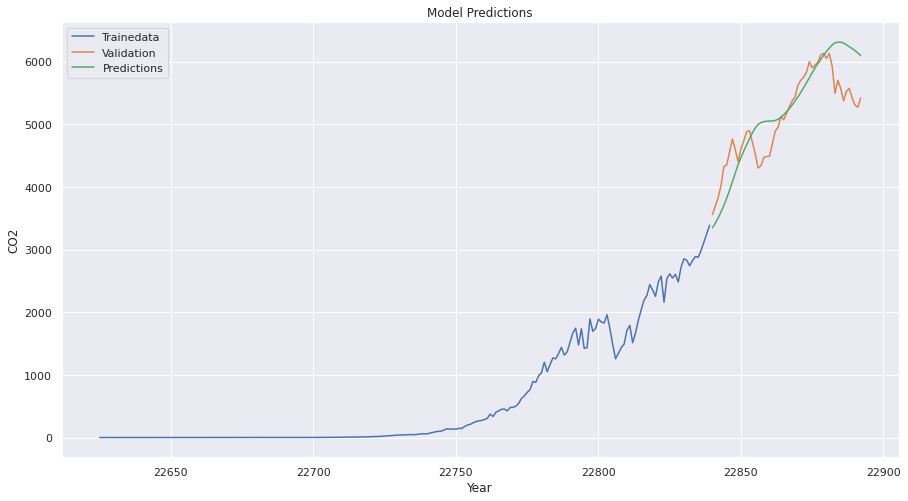

In [158]:
carbon_train = carbondata[:training_data_len4]
carbonvalid = carbondata[training_data_len4:]
carbonvalid['Predictions'] = carbon_predictions
plt.figure(figsize=(15,8))
plt.title('Model Predictions')
plt.xlabel('Year')
plt.ylabel('CO2')
plt.plot(carbon_train['co2'])
plt.plot(carbonvalid[['co2','Predictions']])
plt.legend(['Trainedata','Validation','Predictions'])
plt.show()

co2 gdp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


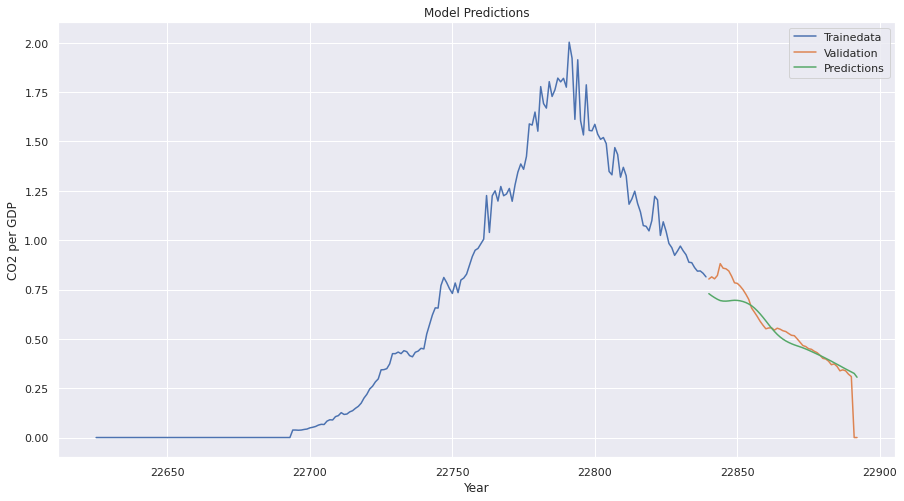

In [159]:
carbon_train1 = carbondata1[:training_data_len5]
carbonvalid1 = carbondata1[training_data_len5:]
carbonvalid1['Predictions'] = carbon_predictions1
plt.figure(figsize=(15,8))
plt.title('Model Predictions')
plt.xlabel('Year')
plt.ylabel('CO2 per GDP')
plt.plot(carbon_train1['co2_per_gdp'])
plt.plot(carbonvalid1[['co2_per_gdp','Predictions']])
plt.legend(['Trainedata','Validation','Predictions'])
plt.show()

share global

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


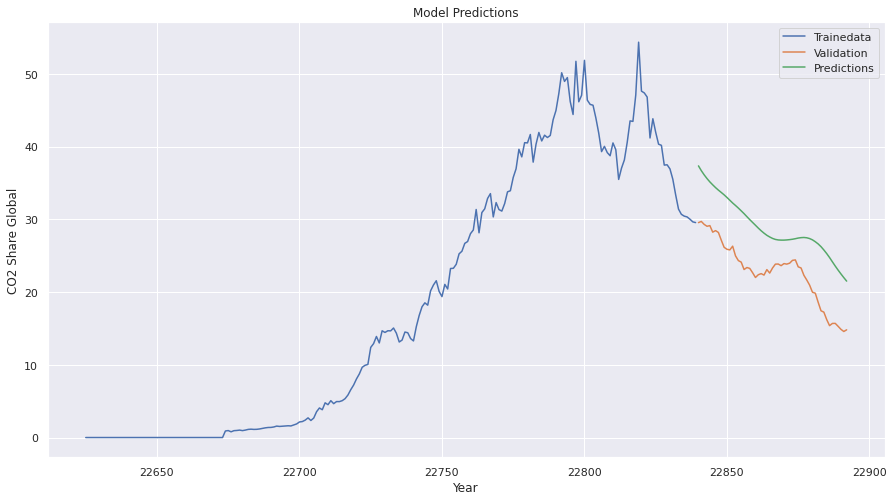

In [167]:
carbon_train2 = carbondata2[:training_data_len6]
carbonvalid2 = carbondata2[training_data_len6:]
carbonvalid2['Predictions'] = carbon_predictions2
plt.figure(figsize=(15,8))
plt.title('Model Predictions')
plt.xlabel('Year')
plt.ylabel('CO2 Share Global')
plt.plot(carbon_train2['share_global_co2'])
plt.plot(carbonvalid2[['share_global_co2','Predictions']])
plt.legend(['Trainedata','Validation','Predictions'])
plt.show()

In [161]:
carbonvalid

,co2,Predictions
22840,3559.179,3346.587503
22841,3693.298,3420.960735
22842,3828.306,3505.245695
22843,4021.503,3598.518996
22844,4325.501,3702.188193
22845,4351.309,3821.400444
22846,4558.453,3947.037322
22847,4762.452,4080.401147
22848,4592.958,4221.636986
22849,4400.795,4354.785584


In [162]:
carbonvalid1

,co2_per_gdp,Predictions
22840,0.803,0.728902
22841,0.814,0.718306
22842,0.804,0.708909
22843,0.821,0.700486
22844,0.881,0.693896
22845,0.858,0.691366
22846,0.855,0.691056
22847,0.844,0.692299
22848,0.817,0.694185
22849,0.784,0.695383


In [163]:
carbonvalid2

,share_global_co2,Predictions
22840,29.548,37.348551
22841,29.710,36.690974
22842,29.305,36.116130
22843,29.044,35.603987
22844,29.136,35.144417
22845,28.237,34.742656
22846,28.448,34.359394
22847,28.191,34.013081
22848,27.139,33.695154
22849,26.155,33.366559


CO2

In [164]:
newcarbonco = carbondf.filter(['co2'])
lastdayco = newcarbonco[-60:].values
lastdayscaledco = carbonscaler.transform(lastdayco)
c_testing = []
c_testing.append(lastdayscaledco)
c_testing = np.array(c_testing)
c_testing = np.reshape(c_testing,(c_testing.shape[0],c_testing.shape[1],1))
predictpriceco = carbonmodel.predict(c_testing)
predictpriceco = carbonscaler.inverse_transform(predictpriceco)
print(predictpriceco)

[[6060.104]]


CO2 GDP

In [165]:
newcarbongdp = carbondf.filter(['co2_per_gdp'])
lastdaygdp = newcarbongdp[-60:].values
lastdayscaledgdp = carbonscaler1.transform(lastdaygdp)
gdp_testing = []
gdp_testing.append(lastdayscaledgdp)
gdp_testing = np.array(gdp_testing)
gdp_testing = np.reshape(gdp_testing,(gdp_testing.shape[0],gdp_testing.shape[1],1))
predictpricegdp = carbonmodel1.predict(gdp_testing)
predictpricegdp = carbonscaler1.inverse_transform(predictpricegdp)
print(predictpricegdp)

[[0.2782713]]


**share global**

In [166]:
newcarbonglobal = carbondf.filter(['share_global_co2'])
lastdayglobal = newcarbonglobal[-60:].values
lastdayscaledglobal = carbonscaler2.transform(lastdayglobal)
global_testing = []
global_testing.append(lastdayscaledglobal)
global_testing = np.array(global_testing)
global_testing = np.reshape(global_testing,(global_testing.shape[0],global_testing.shape[1],1))
predictpriceglobal = carbonmodel2.predict(global_testing)
predictpriceglobal = carbonscaler2.inverse_transform(predictpriceglobal)
print(predictpriceglobal)

[[21.06623]]


**Fossil Fuel**

In [ ]:
#Title: Ways to import CSV files in Google Colab using Pydrive
#Item type: Blog Post
#Author: GeeksforGeeks
#Availability: https://www.geeksforgeeks.org/ways-to-import-csv-files-in-google-colab/

# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = 'https://drive.google.com/file/d/17UyI499mUj2nc6-Qp24NoS_wo-YSQHdw/view?usp=sharing'

In [ ]:
id = link.split("/")[-2]
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('fossilConsumption.csv')
fossildf = pd.read_csv('fossilConsumption.csv')

In [ ]:
fossildf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5190 entries, 0 to 5189
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Entity                 5190 non-null   object 
 1   Code                   4145 non-null   object 
 2   Year                   5190 non-null   int64  
 3   Coal Consumption - EJ  5170 non-null   float64
 4   Gas Consumption - EJ   5170 non-null   float64
 5   Oil Consumption - EJ   5184 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 243.4+ KB


In [ ]:
fossildf.rename(columns = {'Coal Consumption - EJ':'CoalConsumption', 'Gas Consumption - EJ':'GasConsumption', 
                              'Oil Consumption - EJ':'OilConsumption','Year':'year'}, inplace = True) 

In [ ]:
fossildf.drop('Code', axis='columns', inplace=True)

In [ ]:
fossildf = fossildf[fossildf.Entity == 'United States']

In [ ]:
fossildf.describe()

,year,CoalConsumption,GasConsumption,OilConsumption
count,55.00000,55.000000,55.000000,55.000000
mean,1992.00000,17.264495,20.957082,34.418647
std,16.02082,3.807827,3.338662,3.705079
min,1965.00000,11.340643,14.973142,23.691820
25%,1978.50000,13.706315,18.838044,32.844587
50%,1992.00000,17.518682,21.116800,34.694430
75%,2005.50000,20.508471,22.279308,36.932854
max,2019.00000,22.849045,30.479222,40.369327


In [ ]:
fossildf.head()

,Entity,year,CoalConsumption,GasConsumption,OilConsumption
4880,United States,1965,11.607279,14.973142,23.691820
4881,United States,1966,12.171046,16.137922,24.875976
4882,United States,1967,11.941188,17.039478,25.837584
4883,United States,1968,12.359075,18.240534,27.630599
4884,United States,1969,12.410055,19.634785,29.135607


In [ ]:
fossildf.tail()

,Entity,year,CoalConsumption,GasConsumption,OilConsumption
4930,United States,2015,15.584680,26.768862,35.660035
4931,United States,2016,14.258668,26.967562,35.917927
4932,United States,2017,13.869334,26.639711,36.285099
4933,United States,2018,13.282051,29.517910,37.107278
4934,United States,2019,11.340643,30.479222,36.988039


In [ ]:
fossildf.shape

(55, 5)

In [ ]:
oilfossildata = fossildf.filter(['OilConsumption'])
oilf_dataset = oilfossildata.values
training_data_len7 = math.ceil(len(oilf_dataset)* .8)
training_data_len7

44

In [ ]:
oilfossildata_gas = fossildf.filter(['GasConsumption'])
oilf_dataset_gas = oilfossildata_gas.values
training_data_len8 = math.ceil(len(oilf_dataset_gas)* .8)
training_data_len8

44

In [ ]:
oilfossildata_coal = fossildf.filter(['CoalConsumption'])
oilf_dataset_coal = oilfossildata_coal.values
training_data_len9 = math.ceil(len(oilf_dataset_coal)* .8)
training_data_len9

44

Oil Consumption

In [ ]:
oilfossilscaler = MinMaxScaler(feature_range = (0,1))
oilfscaled_data = oilfossilscaler.fit_transform(oilf_dataset)
oilfscaled_data

array([[0.        ],
       [0.07100322],
       [0.12866221],
       [0.23617318],
       [0.32641494],
       [0.39627872],
       [0.45870299],
       [0.60988956],
       [0.72278681],
       [0.63704736],
       [0.59725866],
       [0.74543961],
       [0.86573567],
       [0.83879493],
       [0.79143315],
       [0.62888777],
       [0.49163004],
       [0.38991915],
       [0.37892033],
       [0.44350042],
       [0.43582642],
       [0.51225143],
       [0.55225395],
       [0.6341419 ],
       [0.63319297],
       [0.58794078],
       [0.54536426],
       [0.58595243],
       [0.60298505],
       [0.655907  ],
       [0.65105469],
       [0.72653199],
       [0.75514043],
       [0.79210546],
       [0.85380149],
       [0.87914049],
       [0.87534179],
       [0.87656533],
       [0.91146829],
       [0.99656217],
       [1.        ],
       [0.96902539],
       [0.95415305],
       [0.79578591],
       [0.68117129],
       [0.71467667],
       [0.67144096],
       [0.625

Gas Consumption

In [ ]:
oilfossilscaler_gas = MinMaxScaler(feature_range = (0,1))
oilfscaled_data_gas = oilfossilscaler_gas.fit_transform(oilf_dataset_gas)
oilfscaled_data_gas

array([[0.        ],
       [0.07511764],
       [0.13325975],
       [0.21071683],
       [0.30063325],
       [0.36901834],
       [0.4103134 ],
       [0.42434519],
       [0.41296785],
       [0.36520822],
       [0.25592385],
       [0.28026831],
       [0.25486016],
       [0.25913985],
       [0.29988818],
       [0.27353422],
       [0.2436413 ],
       [0.15845485],
       [0.08892689],
       [0.16074457],
       [0.11848282],
       [0.05037973],
       [0.11458317],
       [0.16409915],
       [0.23472411],
       [0.23481438],
       [0.26113361],
       [0.30281624],
       [0.33436998],
       [0.36493749],
       [0.42268866],
       [0.44801077],
       [0.45646574],
       [0.43243072],
       [0.43726852],
       [0.49328533],
       [0.42889928],
       [0.47406319],
       [0.43245619],
       [0.43811568],
       [0.41621129],
       [0.3962096 ],
       [0.48341278],
       [0.49444737],
       [0.46829825],
       [0.53926088],
       [0.56251788],
       [0.631

Coal Consumption

In [ ]:
oilfossilscaler_coal = MinMaxScaler(feature_range = (0,1))
oilfscaled_data_coal = oilfossilscaler_coal.fit_transform(oilf_dataset_coal)
oilfscaled_data_coal

array([[0.02316878],
       [0.07215625],
       [0.05218317],
       [0.08849466],
       [0.09292448],
       [0.08273354],
       [0.0247193 ],
       [0.0663939 ],
       [0.14430509],
       [0.1174271 ],
       [0.11741908],
       [0.19765636],
       [0.22709698],
       [0.21346446],
       [0.32442211],
       [0.35779821],
       [0.40001374],
       [0.34898194],
       [0.39887422],
       [0.50131145],
       [0.53682856],
       [0.51784025],
       [0.58298994],
       [0.6559619 ],
       [0.67542287],
       [0.6843824 ],
       [0.66862159],
       [0.68001346],
       [0.74208275],
       [0.74855508],
       [0.76416775],
       [0.84370009],
       [0.88232565],
       [0.90064421],
       [0.89775272],
       [0.98109948],
       [0.92315988],
       [0.92226465],
       [0.95857719],
       [0.97122895],
       [1.        ],
       [0.96957113],
       [0.99589992],
       [0.96436967],
       [0.7295463 ],
       [0.82907314],
       [0.72663556],
       [0.528

Oil Consumption

In [ ]:
oilftrain_data = oilfscaled_data[0:training_data_len7, :]
oilfx_train = []
oilfy_train = []
for i in range(60, len(oilftrain_data)):
  oilfx_train.append(oilftrain_data[i-60:i,0])
  oilfy_train.append(oilftrain_data[i,0])
  if i <= 61:
    print(oilfx_train)
    print(oilfy_train)
    print()     

Gas Consumption

In [ ]:
oilftrain_data_gas = oilfscaled_data_gas[0:training_data_len8, :]
oilfx_train_gas = []
oilfy_train_gas = []
for i in range(60, len(oilftrain_data_gas)):
  oilfx_train_gas.append(oilftrain_data_gas[i-60:i,0])
  oilfy_train_gas.append(oilftrain_data_gas[i,0])
  if i <= 61:
    print(oilfx_train_gas)
    print(oilfy_train_gas)
    print()

Coal Consumption

In [ ]:
oilftrain_data_coal = oilfscaled_data_coal[0:training_data_len9, :]
oilfx_train_coal = []
oilfy_train_coal = []
for i in range(60, len(oilftrain_data_coal)):
  oilfx_train_coal.append(oilftrain_data_coal[i-60:i,0])
  oilfy_train_coal.append(oilftrain_data_coal[i,0])
  if i <= 61:
    print(oilfx_train_coal)
    print(oilfy_train_coal)
    print()

Oil Consumption

In [ ]:
oilfx_train, oilfy_train = np.array(oilfx_train),np.array(oilfy_train)
oilfx_train.shape

(0,)

Gas Consumption

In [ ]:
oilfx_train_gas, oilfy_train_gas = np.array(oilfx_train_gas),np.array(oilfy_train_gas)
oilfx_train_gas.shape

(0,)

Coal Consumption

In [ ]:
oilfx_train_coal, oilfy_train_coal = np.array(oilfx_train_coal),np.array(oilfy_train_coal)
oilfx_train_coal.shape

(0,)

In [ ]:
oilfx_train = np.reshape(oilfx_train,(oilfx_train.shape[0],oilfx_train.shape[0],1))
oilfx_train.shape

(0, 0, 1)

In [ ]:
oilfx_train_gas = np.reshape(oilfx_train_gas,(oilfx_train_gas.shape[0],oilfx_train_gas.shape[0],1))
oilfx_train_gas.shape

(0, 0, 1)

In [ ]:
oilfx_train_coal = np.reshape(oilfx_train_coal,(oilfx_train_coal.shape[0],oilfx_train_coal.shape[0],1))
oilfx_train_coal.shape

(0, 0, 1)

In [ ]:
oilfmodel = Sequential()
oilfmodel.add(LSTM(70,return_sequences=True, input_shape=(oilfx_train.shape[1],1)))
oilfmodel.add(LSTM(70,return_sequences=False))
oilfmodel.add(Dense(25))
oilfmodel.add(Dense(1))

ValueError: ignored

**Statistical Test**

https://towardsdatascience.com/time-series-analysis-visualization-forecasting-with-lstm-77a905180eba

In [ ]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)
sns.set_context("paper", font_scale=1.3)
import warnings
warnings.filterwarnings('ignore')
from time import time
import matplotlib.ticker as tkr
%matplotlib inline
sns.set(color_codes=True)
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from sklearn import preprocessing
from statsmodels.tsa.stattools import pacf
import keras
from keras.layers import Dropout
from keras.layers import *
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping

**Normality Test**

Tesla

In [ ]:
stat, p = stats.normaltest(tesladf.Close)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Data looks Gaussian (fail to reject H0)')
else:
    print('Data does not look Gaussian (reject H0)')

Statistics=2060.643, p=0.000
Data does not look Gaussian (reject H0)


BMW

In [ ]:
stat, p = stats.normaltest(bmwdf.Close)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Data looks Gaussian (fail to reject H0)')
else:
    print('Data does not look Gaussian (reject H0)')

Statistics=870.364, p=0.000
Data does not look Gaussian (reject H0)


Crude Oil

In [ ]:
stat, p = stats.normaltest(oildf.Close)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Data looks Gaussian (fail to reject H0)')
else:
    print('Data does not look Gaussian (reject H0)')

Statistics=366.452, p=0.000
Data does not look Gaussian (reject H0)


Carbon CO2

In [ ]:
stat, p = stats.normaltest(carbondf.co2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Data looks Gaussian (fail to reject H0)')
else:
    print('Data does not look Gaussian (reject H0)')

Statistics=39.476, p=0.000
Data does not look Gaussian (reject H0)


Carbon per GDP

In [ ]:
stat, p = stats.normaltest(carbondf.co2_per_gdp)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Data looks Gaussian (fail to reject H0)')
else:
    print('Data does not look Gaussian (reject H0)')

Statistics=31.578, p=0.000
Data does not look Gaussian (reject H0)


Global share CO2

In [ ]:
stat, p = stats.normaltest(carbondf.share_global_co2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Data looks Gaussian (fail to reject H0)')
else:
    print('Data does not look Gaussian (reject H0)')

Statistics=152.541, p=0.000
Data does not look Gaussian (reject H0)


Fossil Oil Consumption

In [ ]:
stat, p = stats.normaltest(fossildf.OilConsumption)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Data looks Gaussian (fail to reject H0)')
else:
    print('Data does not look Gaussian (reject H0)')

Statistics=8.703, p=0.013
Data does not look Gaussian (reject H0)


Fossil Coal Consumption

In [ ]:
stat, p = stats.normaltest(fossildf.CoalConsumption)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Data looks Gaussian (fail to reject H0)')
else:
    print('Data does not look Gaussian (reject H0)')

Statistics=32.684, p=0.000
Data does not look Gaussian (reject H0)


Fossil Gas Consumption

In [ ]:
stat, p = stats.normaltest(fossildf.GasConsumption)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Data looks Gaussian (fail to reject H0)')
else:
    print('Data does not look Gaussian (reject H0)')

Statistics=6.144, p=0.046
Data does not look Gaussian (reject H0)


**Kurtosis and Skewness**

Tesla

Kurtosis of normal distribution: 15.64671099503665
Skewness of normal distribution: 3.773835544652476


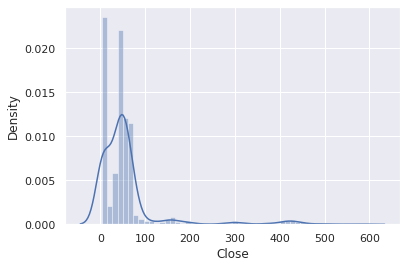

In [ ]:
sns.distplot(tesladf.Close);
print( 'Kurtosis of normal distribution: {}'.format(stats.kurtosis(tesladf.Close)))
print( 'Skewness of normal distribution: {}'.format(stats.skew(tesladf.Close)))
#kurtosis greater than 0 = heavier tails
#skewness greater than 1 = higly skewed

BMW

Kurtosis of normal distribution: -0.8009578156054862
Skewness of normal distribution: 0.6303788130818956


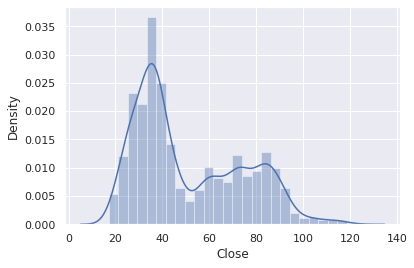

In [ ]:
sns.distplot(bmwdf.Close);
print( 'Kurtosis of normal distribution: {}'.format(stats.kurtosis(bmwdf.Close)))
print( 'Skewness of normal distribution: {}'.format(stats.skew(bmwdf.Close)))
#kurtosis less than 0 = light tails
#skewness = moderately skewed

Crude Oil

Kurtosis of normal distribution: -0.678584482810705
Skewness of normal distribution: 0.39756279189404126


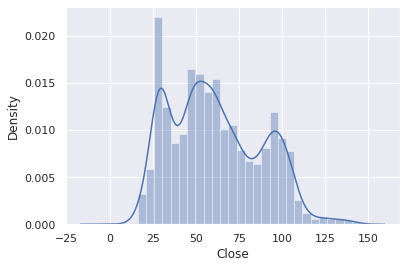

In [ ]:
sns.distplot(oildf.Close);
print( 'Kurtosis of normal distribution: {}'.format(stats.kurtosis(oildf.Close)))
print( 'Skewness of normal distribution: {}'.format(stats.skew(oildf.Close)))
#kurtosis less than 0 = lighter tails
#skewness = moderately skewed

CO2

Kurtosis of normal distribution: -0.2916962543438375
Skewness of normal distribution: 1.086223586834107


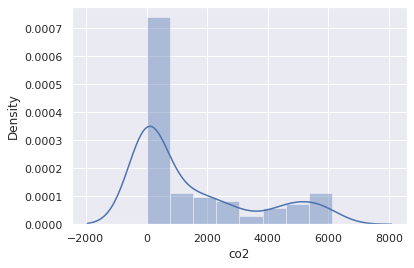

In [ ]:
sns.distplot(carbondf.co2);
print( 'Kurtosis of normal distribution: {}'.format(stats.kurtosis(carbondf.co2)))
print( 'Skewness of normal distribution: {}'.format(stats.skew(carbondf.co2)))
#kurtosis less than 0 = lighter tails
#skewness greater than 1 = higly skewed

CO2 per gdp

Kurtosis of normal distribution: -0.7613151178577056
Skewness of normal distribution: 0.6154423559603132


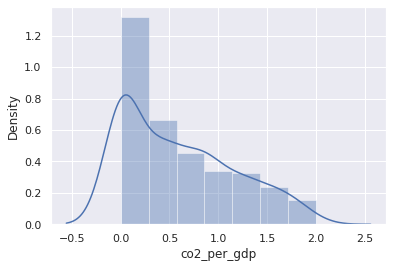

In [ ]:
sns.distplot(carbondf.co2_per_gdp);
print( 'Kurtosis of normal distribution: {}'.format(stats.kurtosis(carbondf.co2_per_gdp)))
print( 'Skewness of normal distribution: {}'.format(stats.skew(carbondf.co2_per_gdp)))
#kurtosis less than 0 = lighter tails
#skewness greater than 1 = higly skewed

Share Global 

Kurtosis of normal distribution: -1.2117447591847055
Skewness of normal distribution: 0.26376418035368465


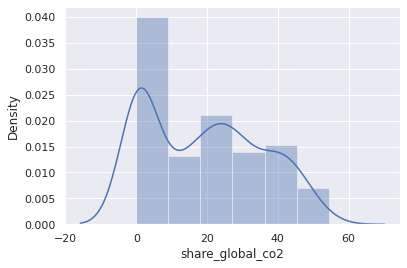

In [ ]:
sns.distplot(carbondf.share_global_co2);
print( 'Kurtosis of normal distribution: {}'.format(stats.kurtosis(carbondf.share_global_co2)))
print( 'Skewness of normal distribution: {}'.format(stats.skew(carbondf.share_global_co2)))
#kurtosis less than 0 = lighter tails
#skewness less than 1 = moderately skewed

Oil Consumption

Kurtosis of normal distribution: 0.7174403616612084
Skewness of normal distribution: -0.8615836114885709


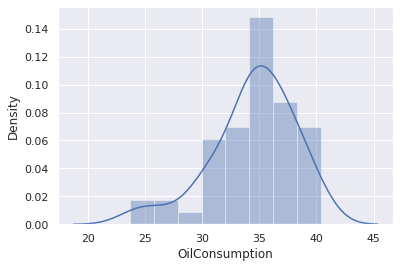

In [ ]:
sns.distplot(fossildf.OilConsumption);
print( 'Kurtosis of normal distribution: {}'.format(stats.kurtosis(fossildf.OilConsumption)))
print( 'Skewness of normal distribution: {}'.format(stats.skew(fossildf.OilConsumption)))
#kurtosis greater than 0 = heavier tails
#skewness less than 1 = moderately skewed

Coal Consumption

Kurtosis of normal distribution: -1.4070204389819623
Skewness of normal distribution: -0.054991084697558916


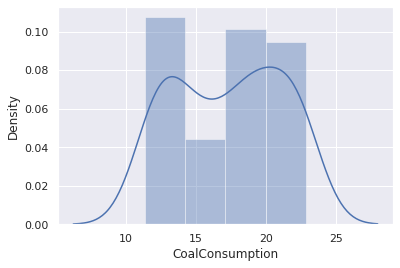

In [ ]:
sns.distplot(fossildf.CoalConsumption);
print( 'Kurtosis of normal distribution: {}'.format(stats.kurtosis(fossildf.CoalConsumption)))
print( 'Skewness of normal distribution: {}'.format(stats.skew(fossildf.CoalConsumption)))
#kurtosis less than 0 = lighter tails
#skewness = fairly skewed

Gas Consumption

Kurtosis of normal distribution: 0.48953867994220834
Skewness of normal distribution: 0.7111685179549132


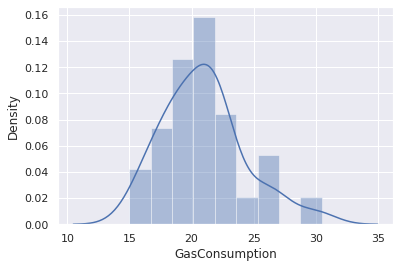

In [ ]:
sns.distplot(fossildf.GasConsumption);
print( 'Kurtosis of normal distribution: {}'.format(stats.kurtosis(fossildf.GasConsumption)))
print( 'Skewness of normal distribution: {}'.format(stats.skew(fossildf.GasConsumption)))
#kurtosis less than 0 = lighter tails
#skewness less than 1 = moderately skewed

**Distribution**

Tesla

,count,mean,std,min,25%,50%,75%,max
High,2624.0000,57.2221,79.4423,3.3260,7.5665,45.0340,61.3580,607.8000
Low,2624.0000,54.7111,74.9956,2.9960,7.2895,43.6200,59.0695,578.4500
Open,2624.0000,55.9917,77.2867,3.2280,7.3370,44.3740,60.2010,602.2100
Close,2624.0000,56.0230,77.3664,3.1600,7.3895,44.2060,60.2445,585.7600
Volume,2624.0000,31558623.2470,29094165.7178,592500.0000,11032375.0000,24739250.0000,40839250.0000,304694000.0000
Adj Close,2624.0000,56.0230,77.3664,3.1600,7.3895,44.2060,60.2445,585.7600


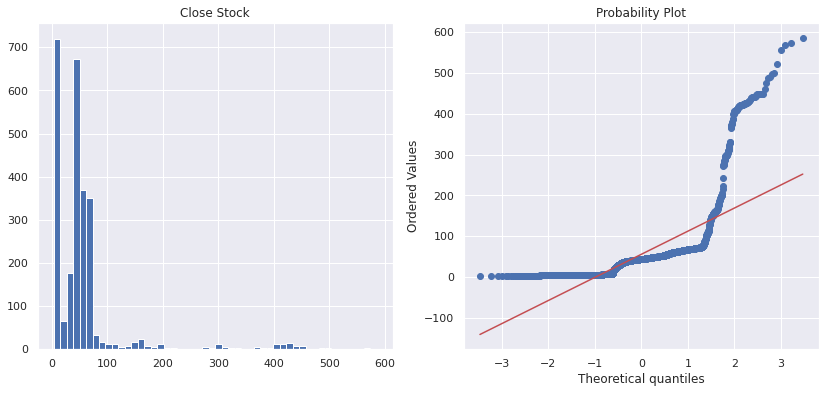

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
tesladf['Close'].hist(bins=50)
plt.title('Close Stock')
plt.subplot(1,2,2)
stats.probplot(tesladf['Close'], plot=plt);
tesladf.describe().T

from plot it can be visualised that it is not normally distributed

BMW

,count,mean,std,min,25%,50%,75%,max
High,6170.0000,51.7767,23.1345,17.8150,33.7000,41.8825,72.3575,123.7500
Low,6170.0000,50.4633,22.7989,16.0000,32.8025,40.7460,70.9050,120.3500
Open,6170.0000,51.1525,22.9893,17.2800,33.3000,41.3000,71.6650,123.3000
Close,6170.0000,51.1303,22.9768,17.0400,33.2500,41.3000,71.6800,122.6000
Volume,6170.0000,2257900.3024,1513670.0848,0.0000,1341398.7500,1960617.0000,2783426.7500,28719542.0000
Adj Close,6170.0000,37.6505,21.7168,10.4712,20.6109,26.3000,60.3553,94.4702


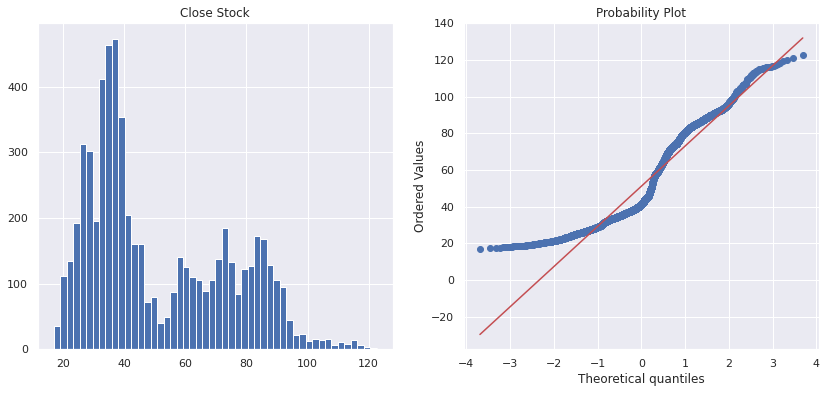

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
bmwdf['Close'].hist(bins=50)
plt.title('Close Stock')
plt.subplot(1,2,2)
stats.probplot(bmwdf['Close'], plot=plt);
bmwdf.describe().T

Crude oil

,count,mean,std,min,25%,50%,75%,max
Open,5099.0000,61.4210,26.1780,1.4000,40.2300,58.3100,81.7850,145.1900
High,5099.0000,62.3314,26.4106,13.8500,40.9750,59.0400,82.8600,147.2700
Low,5099.0000,60.4432,25.9231,-39.4400,39.4100,57.3600,80.5250,142.4900
Close,5099.0000,61.4242,26.1744,-2.7200,40.1850,58.1400,81.7700,145.1800
Adj Close,5099.0000,61.4242,26.1744,-2.7200,40.1850,58.1400,81.7700,145.1800
Volume,5099.0000,2151294.7005,23557693.9609,0.0000,102516.0000,245915.0000,391716.5000,459935470.0000


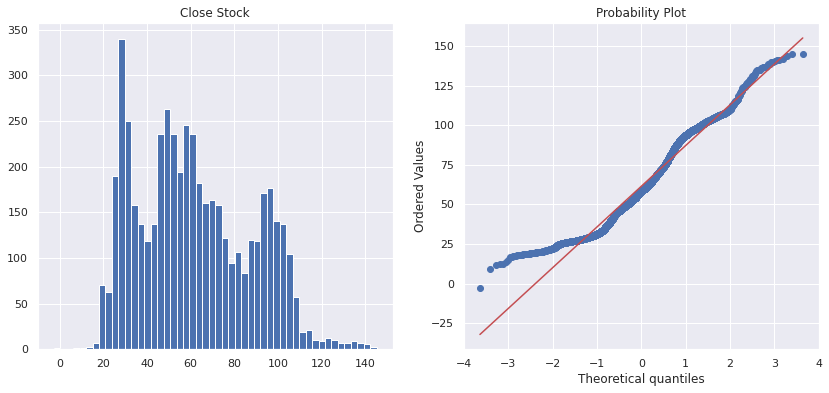

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
oildf['Close'].hist(bins=50)
plt.title('Close Stock')
plt.subplot(1,2,2)
stats.probplot(oildf['Close'], plot=plt);
oildf.describe().T

Carbon

,count,mean,std,min,25%,50%,75%,max
year,268.0000,1884.5000,77.5091,1751.0000,1817.7500,1884.5000,1951.2500,2018.0000
co2,268.0000,1510.3336,1992.0073,0.0000,0.7510,269.8755,2553.0730,6130.5520
share_global_co2,268.0000,19.1850,16.1261,0.0000,1.5078,19.9105,31.3425,54.3530
co2_per_gdp,268.0000,0.5969,0.5668,0.0000,0.0000,0.4565,0.9728,2.0030


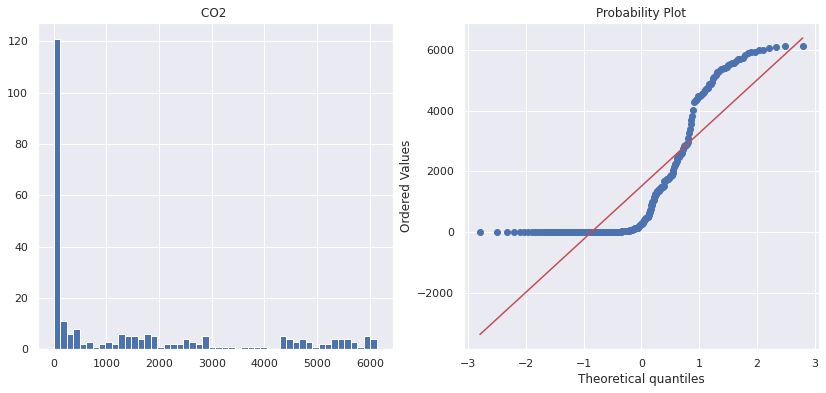

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
carbondf['co2'].hist(bins=50)
plt.title('CO2 ')
plt.subplot(1,2,2)
stats.probplot(carbondf['co2'], plot=plt);
carbondf.describe().T

CO2 per gdp

,count,mean,std,min,25%,50%,75%,max
year,268.0000,1884.5000,77.5091,1751.0000,1817.7500,1884.5000,1951.2500,2018.0000
co2,268.0000,1510.3336,1992.0073,0.0000,0.7510,269.8755,2553.0730,6130.5520
share_global_co2,268.0000,19.1850,16.1261,0.0000,1.5078,19.9105,31.3425,54.3530
co2_per_gdp,268.0000,0.5969,0.5668,0.0000,0.0000,0.4565,0.9728,2.0030


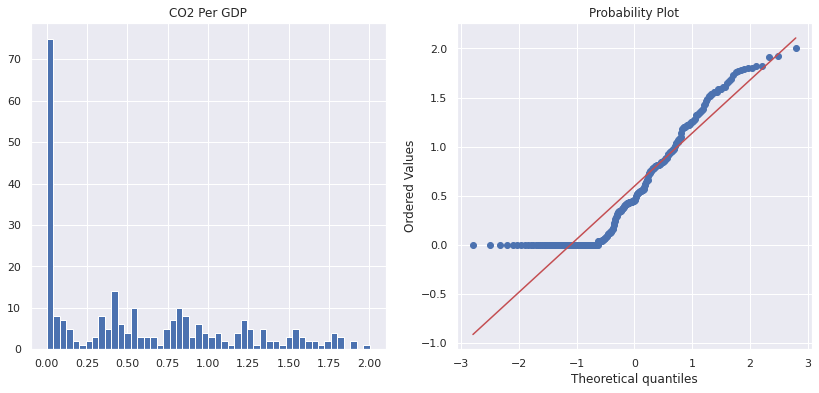

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
carbondf['co2_per_gdp'].hist(bins=50)
plt.title('CO2 Per GDP')
plt.subplot(1,2,2)
stats.probplot(carbondf['co2_per_gdp'], plot=plt);
carbondf.describe().T

Share Global

,count,mean,std,min,25%,50%,75%,max
year,268.0000,1884.5000,77.5091,1751.0000,1817.7500,1884.5000,1951.2500,2018.0000
co2,268.0000,1510.3336,1992.0073,0.0000,0.7510,269.8755,2553.0730,6130.5520
share_global_co2,268.0000,19.1850,16.1261,0.0000,1.5078,19.9105,31.3425,54.3530
co2_per_gdp,268.0000,0.5969,0.5668,0.0000,0.0000,0.4565,0.9728,2.0030


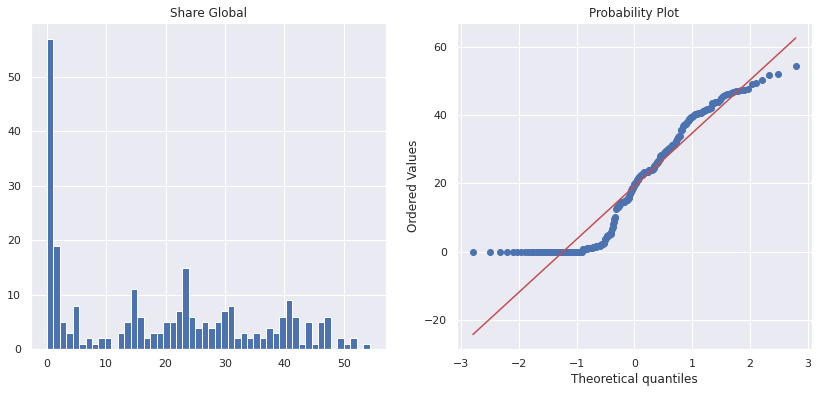

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
carbondf['share_global_co2'].hist(bins=50)
plt.title('Share Global')
plt.subplot(1,2,2)
stats.probplot(carbondf['share_global_co2'], plot=plt);
carbondf.describe().T

Oil Consumption

,count,mean,std,min,25%,50%,75%,max
year,55.0000,1992.0000,16.0208,1965.0000,1978.5000,1992.0000,2005.5000,2019.0000
CoalConsumption,55.0000,17.2645,3.8078,11.3406,13.7063,17.5187,20.5085,22.8490
GasConsumption,55.0000,20.9571,3.3387,14.9731,18.8380,21.1168,22.2793,30.4792
OilConsumption,55.0000,34.4186,3.7051,23.6918,32.8446,34.6944,36.9329,40.3693


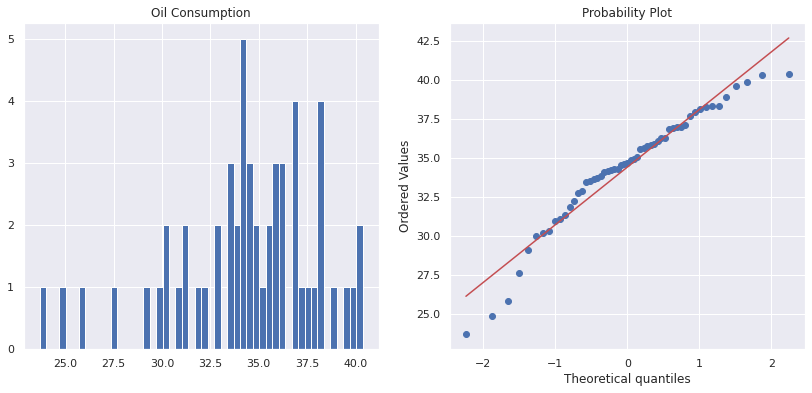

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
fossildf['OilConsumption'].hist(bins=50)
plt.title('Oil Consumption')
plt.subplot(1,2,2)
stats.probplot(fossildf['OilConsumption'], plot=plt);
fossildf.describe().T

Coal Consumption

,count,mean,std,min,25%,50%,75%,max
year,55.0000,1992.0000,16.0208,1965.0000,1978.5000,1992.0000,2005.5000,2019.0000
CoalConsumption,55.0000,17.2645,3.8078,11.3406,13.7063,17.5187,20.5085,22.8490
GasConsumption,55.0000,20.9571,3.3387,14.9731,18.8380,21.1168,22.2793,30.4792
OilConsumption,55.0000,34.4186,3.7051,23.6918,32.8446,34.6944,36.9329,40.3693


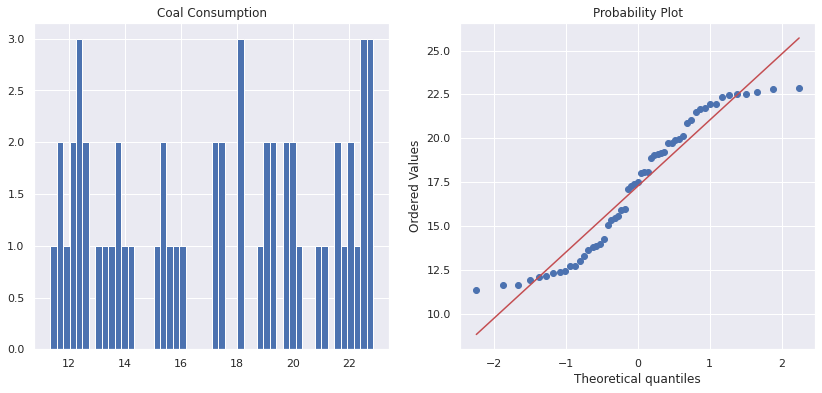

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
fossildf['CoalConsumption'].hist(bins=50)
plt.title('Coal Consumption')
plt.subplot(1,2,2)
stats.probplot(fossildf['CoalConsumption'], plot=plt);
fossildf.describe().T

,count,mean,std,min,25%,50%,75%,max
year,55.0000,1992.0000,16.0208,1965.0000,1978.5000,1992.0000,2005.5000,2019.0000
CoalConsumption,55.0000,17.2645,3.8078,11.3406,13.7063,17.5187,20.5085,22.8490
GasConsumption,55.0000,20.9571,3.3387,14.9731,18.8380,21.1168,22.2793,30.4792
OilConsumption,55.0000,34.4186,3.7051,23.6918,32.8446,34.6944,36.9329,40.3693


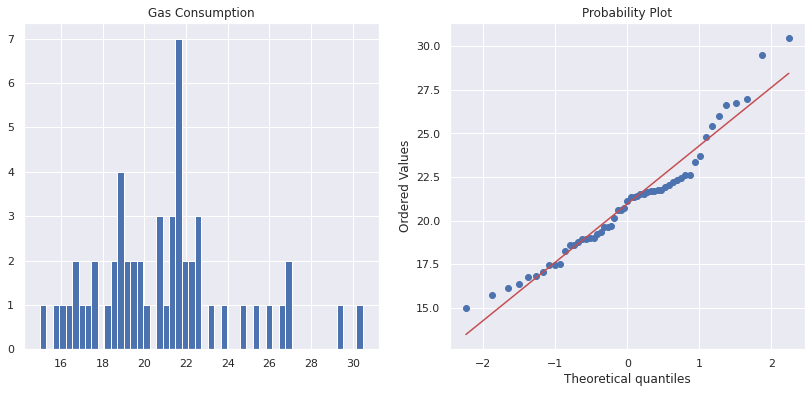

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
fossildf['GasConsumption'].hist(bins=50)
plt.title('Gas Consumption')
plt.subplot(1,2,2)
stats.probplot(fossildf['GasConsumption'], plot=plt);
fossildf.describe().T